In [2]:
import pandas as pd

# Read the Label.csv file
labels = pd.read_csv('../data/CICD/Label.csv')
# Read the Data.csv file
data = pd.read_csv('../data/CICD/Data.csv')


In [3]:
# Train/test split
from sklearn.model_selection import train_test_split

# Create X (features) and y (target)
X = data
y = labels['Label']

# Create train/test split with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training set shape: (358332, 76)
Testing set shape: (89583, 76)
Training labels shape: (358332,)
Testing labels shape: (89583,)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, class_weight='balanced', random_state=42, n_jobs=-1)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': data.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

Accuracy: 0.9321299800185303
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71666
           1       0.28      0.97      0.43        77
           2       0.77      0.57      0.65        90
           3       0.61      0.34      0.43       894
           4       0.84      0.74      0.79      6190
           5       0.59      0.91      0.72      5923
           6       0.85      0.77      0.80       927
           7       0.80      0.70      0.75      3347
           8       0.36      0.40      0.38       420
           9       0.27      0.45      0.34        49

    accuracy                           0.93     89583
   macro avg       0.64      0.68      0.63     89583
weighted avg       0.94      0.93      0.94     89583


Top 10 Most Important Features:
                       feature  importance
5        Fwd Packet Length Max    0.053418
3   Total Length of Fwd Packet    0.051285
38           Packet Length 

Confusion Matrix:
[[69856    58     6     6    89  1517    11    84    35     4]
 [    0    75     0     1     1     0     0     0     0     0]
 [    0     0    51     1    15    19     1     2     0     1]
 [    3    41     1   300   285   190    14    31    25     4]
 [    7    89     3   113  4590   980    39   308    52     9]
 [   16     3     4    27   146  5399    61    91   144    32]
 [    2     4     0    10    42   114   710    26    17     2]
 [    2     2     1    16   209   749     1  2333    27     7]
 [    1     0     0    14    48   165     2    22   167     1]
 [    0     0     0     0     7    18     0     2     0    22]]
Confusion matrix, without normalization
[[69856    58     6     6    89  1517    11    84    35     4]
 [    0    75     0     1     1     0     0     0     0     0]
 [    0     0    51     1    15    19     1     2     0     1]
 [    3    41     1   300   285   190    14    31    25     4]
 [    7    89     3   113  4590   980    39   308    52    

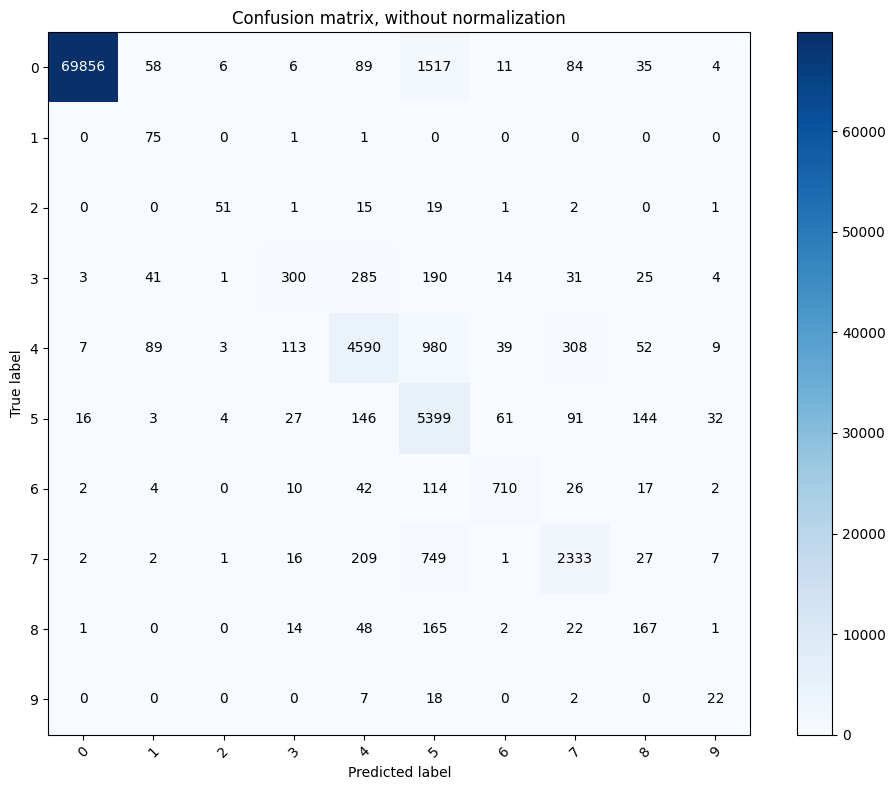

Normalized confusion matrix
[[9.74743951e-01 8.09309854e-04 8.37217090e-05 8.37217090e-05
  1.24187202e-03 2.11676388e-02 1.53489800e-04 1.17210393e-03
  4.88376636e-04 5.58144727e-05]
 [0.00000000e+00 9.74025974e-01 0.00000000e+00 1.29870130e-02
  1.29870130e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.66666667e-01 1.11111111e-02
  1.66666667e-01 2.11111111e-01 1.11111111e-02 2.22222222e-02
  0.00000000e+00 1.11111111e-02]
 [3.35570470e-03 4.58612975e-02 1.11856823e-03 3.35570470e-01
  3.18791946e-01 2.12527964e-01 1.56599553e-02 3.46756152e-02
  2.79642058e-02 4.47427293e-03]
 [1.13085622e-03 1.43780291e-02 4.84652666e-04 1.82552504e-02
  7.41518578e-01 1.58319871e-01 6.30048465e-03 4.97576737e-02
  8.40064620e-03 1.45395800e-03]
 [2.70133378e-03 5.06500084e-04 6.75333446e-04 4.55850076e-03
  2.46496708e-02 9.11531319e-01 1.02988350e-02 1.53638359e-02
  2.43120041e-02 5.40266757e-03]
 [2.15749730e-03 4.31499461e-0

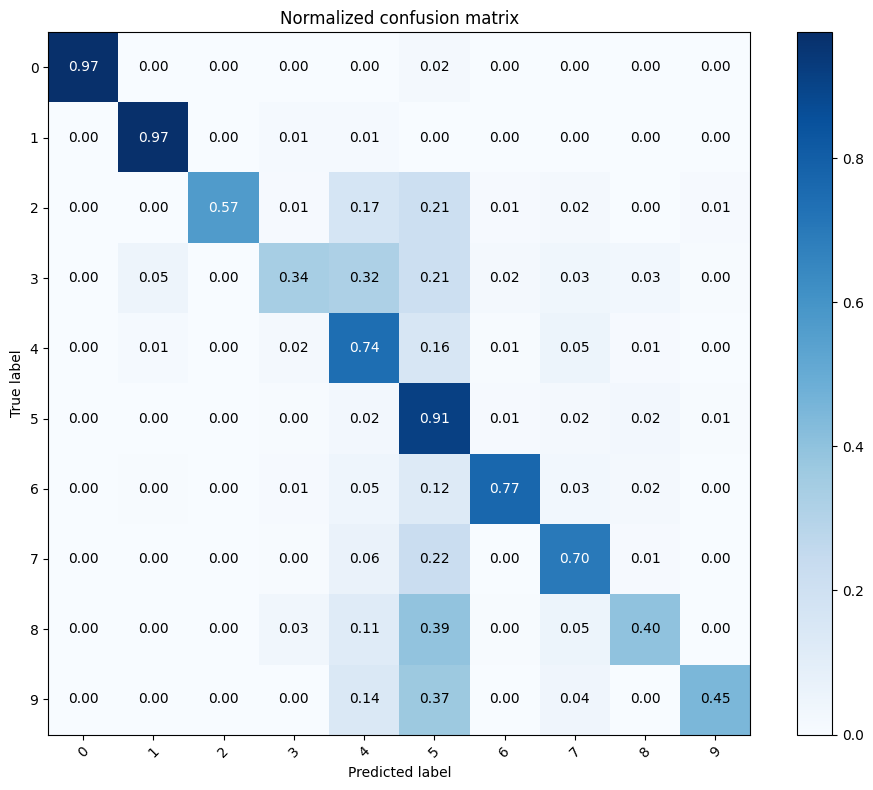

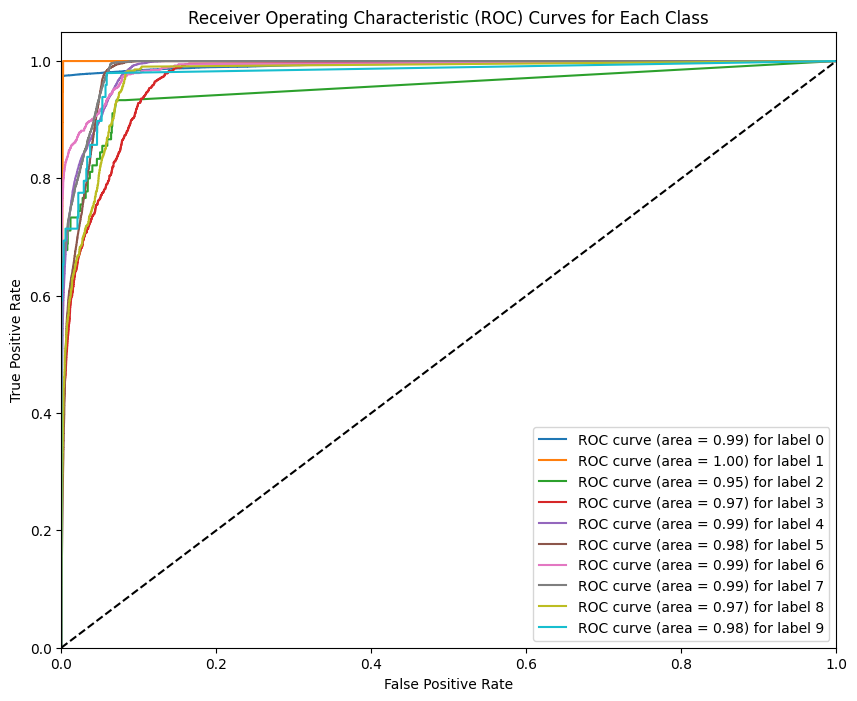

In [5]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot confusion matrix
class_names = sorted(labels['Label'].unique())
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

# Binarize the labels for ROC calculation
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], rf_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], class_names[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

In [6]:
print("Based on the confusion matrix, the pairs of classes that are most frequently confused with each other are:")

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j:
            print(f"* Class {class_names[i]} is confused with Class {class_names[j]} ({conf_matrix[i, j]} instances)")


Based on the confusion matrix, the pairs of classes that are most frequently confused with each other are:
* Class 0 is confused with Class 1 (58 instances)
* Class 0 is confused with Class 2 (6 instances)
* Class 0 is confused with Class 3 (6 instances)
* Class 0 is confused with Class 4 (89 instances)
* Class 0 is confused with Class 5 (1517 instances)
* Class 0 is confused with Class 6 (11 instances)
* Class 0 is confused with Class 7 (84 instances)
* Class 0 is confused with Class 8 (35 instances)
* Class 0 is confused with Class 9 (4 instances)
* Class 1 is confused with Class 0 (0 instances)
* Class 1 is confused with Class 2 (0 instances)
* Class 1 is confused with Class 3 (1 instances)
* Class 1 is confused with Class 4 (1 instances)
* Class 1 is confused with Class 5 (0 instances)
* Class 1 is confused with Class 6 (0 instances)
* Class 1 is confused with Class 7 (0 instances)
* Class 1 is confused with Class 8 (0 instances)
* Class 1 is confused with Class 9 (0 instances)
* C

In [7]:
# Extract the confusion counts from the confusion matrix
confused_pairs = []
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i, j] > 0:
            confused_pairs.append(((class_names[i], class_names[j]), conf_matrix[i, j]))

# Sort the confused pairs based on the number of instances in descending order
confused_pairs_sorted = sorted(confused_pairs, key=lambda x: x[1], reverse=True)

print("Pairs of classes that are most frequently confused with each other (in descending order):")
for (pair, count) in confused_pairs_sorted:
    print(f"* Class {pair[0]} is confused with Class {pair[1]} ({count} instances)")

Pairs of classes that are most frequently confused with each other (in descending order):
* Class 0 is confused with Class 5 (1517 instances)
* Class 4 is confused with Class 5 (980 instances)
* Class 7 is confused with Class 5 (749 instances)
* Class 4 is confused with Class 7 (308 instances)
* Class 3 is confused with Class 4 (285 instances)
* Class 7 is confused with Class 4 (209 instances)
* Class 3 is confused with Class 5 (190 instances)
* Class 8 is confused with Class 5 (165 instances)
* Class 5 is confused with Class 4 (146 instances)
* Class 5 is confused with Class 8 (144 instances)
* Class 6 is confused with Class 5 (114 instances)
* Class 4 is confused with Class 3 (113 instances)
* Class 5 is confused with Class 7 (91 instances)
* Class 0 is confused with Class 4 (89 instances)
* Class 4 is confused with Class 1 (89 instances)
* Class 0 is confused with Class 7 (84 instances)
* Class 5 is confused with Class 6 (61 instances)
* Class 0 is confused with Class 1 (58 instance

In [8]:
from sklearn.inspection import permutation_importance

# 1. Feature importance analysis for class 5

# Calculate permutation importance specifically for class 5
result = permutation_importance(rf_classifier, X_test, y_test, 
                              n_repeats=10, 
                              random_state=42)

# Create DataFrame of feature importance specifically for this problem
class_importance = pd.DataFrame({
    'feature': X_test.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features for Classification:")
print(class_importance.head(10))

# 2. Analyze samples that are misclassified
misclassified = X_test[y_test != y_pred]
misclassified_true = y_test[y_test != y_pred]
misclassified_pred = y_pred[y_test != y_pred]

# Focus on class 5 misclassifications
class_5_errors = misclassified[
    (misclassified_true == 5) | (misclassified_pred == 5)
]

print("\nStatistical summary of misclassified samples for class 5:")
print(class_5_errors.describe())

Top 10 Most Important Features for Classification:
                       feature  importance
45              PSH Flag Count    0.005014
36               Bwd Packets/s    0.004787
53        Bwd Segment Size Avg    0.003227
5        Fwd Packet Length Max    0.002248
67            Fwd Seg Size Min    0.002053
11      Bwd Packet Length Mean    0.002036
20                Fwd IAT Mean    0.001926
19               Fwd IAT Total    0.001192
9        Bwd Packet Length Max    0.001019
3   Total Length of Fwd Packet    0.000919

Statistical summary of misclassified samples for class 5:
       Flow Duration  Total Fwd Packet  Total Bwd packets  \
count   4.276000e+03       4276.000000        4276.000000   
mean    2.754317e+05          4.630496           2.372544   
std     2.581591e+06         10.633503           2.206823   
min     1.000000e+00          1.000000           0.000000   
25%     4.859175e+04          3.000000           2.000000   
50%     7.603650e+04          3.000000           2.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define custom class weights, increasing weight for class 5
class_weights = {
    0: 1,
    1: 1,
    2: 1,
    3: 1,
    4: 4,
    5: 5,  # Increase weight for class 5
    6: 1,
    7: 1,
    8: 1,
    9: 1
}

# Initialize the Random Forest Classifier with custom class weights
rf_classifier_weighted = RandomForestClassifier(n_estimators=100,
                                                 max_depth=20,
                                                 class_weight=class_weights,
                                                 random_state=42,
                                                 n_jobs=-1)

# Train the model on the training data
rf_classifier_weighted.fit(X_train, y_train)

# Make predictions on the test data
y_pred_weighted = rf_classifier_weighted.predict(X_test)

# Evaluate the model's performance
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy with Weighted Classes:", accuracy_weighted)

# Print the classification report
print("Classification Report with Weighted Classes:")
print(classification_report(y_test, y_pred_weighted))

# Get feature importance
feature_importance_weighted = pd.DataFrame({
    'feature': data.columns,
    'importance': rf_classifier_weighted.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Weighted):")
print(feature_importance_weighted.head(10))

Accuracy with Weighted Classes: 0.9353225500373955
Classification Report with Weighted Classes:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71666
           1       0.43      0.13      0.20        77
           2       0.92      0.49      0.64        90
           3       0.78      0.23      0.35       894
           4       0.77      0.80      0.79      6190
           5       0.59      0.95      0.73      5923
           6       0.90      0.70      0.79       927
           7       0.93      0.62      0.74      3347
           8       0.51      0.17      0.26       420
           9       0.67      0.08      0.15        49

    accuracy                           0.94     89583
   macro avg       0.75      0.52      0.56     89583
weighted avg       0.95      0.94      0.94     89583


Top 10 Most Important Features (Weighted):
                       feature  importance
67            Fwd Seg Size Min    0.077209
36             

Confusion matrix, without normalization
[[69856    58     6     6    89  1517    11    84    35     4]
 [    0    75     0     1     1     0     0     0     0     0]
 [    0     0    51     1    15    19     1     2     0     1]
 [    3    41     1   300   285   190    14    31    25     4]
 [    7    89     3   113  4590   980    39   308    52     9]
 [   16     3     4    27   146  5399    61    91   144    32]
 [    2     4     0    10    42   114   710    26    17     2]
 [    2     2     1    16   209   749     1  2333    27     7]
 [    1     0     0    14    48   165     2    22   167     1]
 [    0     0     0     0     7    18     0     2     0    22]]


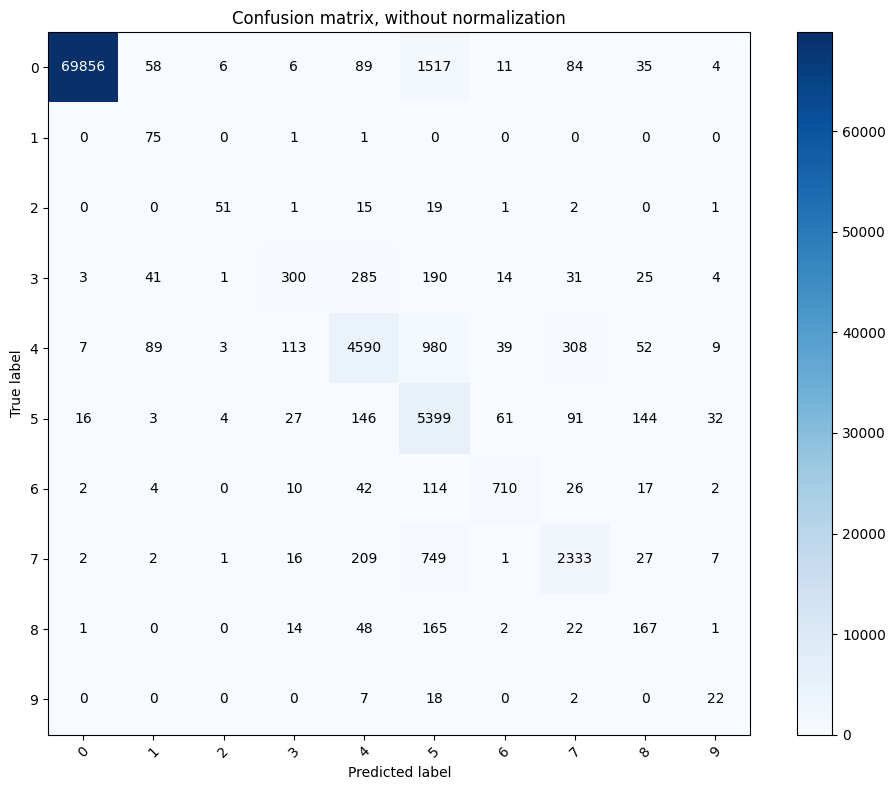

Normalized confusion matrix
[[9.74743951e-01 8.09309854e-04 8.37217090e-05 8.37217090e-05
  1.24187202e-03 2.11676388e-02 1.53489800e-04 1.17210393e-03
  4.88376636e-04 5.58144727e-05]
 [0.00000000e+00 9.74025974e-01 0.00000000e+00 1.29870130e-02
  1.29870130e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.66666667e-01 1.11111111e-02
  1.66666667e-01 2.11111111e-01 1.11111111e-02 2.22222222e-02
  0.00000000e+00 1.11111111e-02]
 [3.35570470e-03 4.58612975e-02 1.11856823e-03 3.35570470e-01
  3.18791946e-01 2.12527964e-01 1.56599553e-02 3.46756152e-02
  2.79642058e-02 4.47427293e-03]
 [1.13085622e-03 1.43780291e-02 4.84652666e-04 1.82552504e-02
  7.41518578e-01 1.58319871e-01 6.30048465e-03 4.97576737e-02
  8.40064620e-03 1.45395800e-03]
 [2.70133378e-03 5.06500084e-04 6.75333446e-04 4.55850076e-03
  2.46496708e-02 9.11531319e-01 1.02988350e-02 1.53638359e-02
  2.43120041e-02 5.40266757e-03]
 [2.15749730e-03 4.31499461e-0

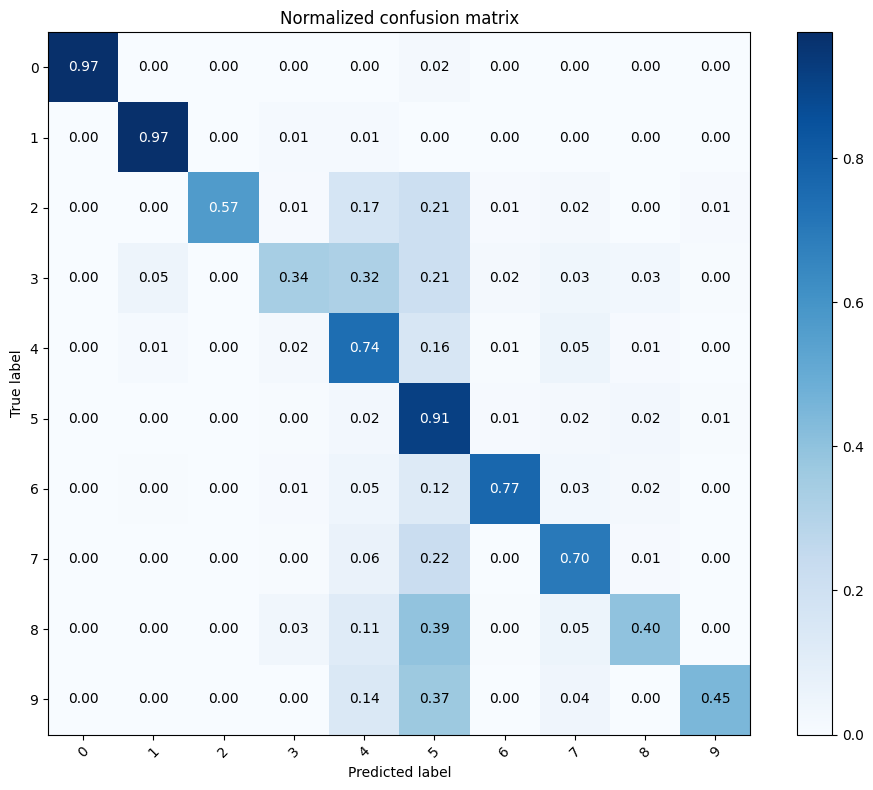

In [10]:
# Plot confusion matrix
class_names = sorted(labels['Label'].unique())
plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

plt.figure(figsize=(10, 8))
plot_confusion_matrix(conf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [11]:
import mlflow
from mlflow.models import infer_signature
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

import io  # Import the io module
import os
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "http://192.168.1.189:9000"
os.environ["AWS_ACCESS_KEY_ID"] = "roberto"
os.environ["AWS_SECRET_ACCESS_KEY"] = "patilla1"


# Set remote MLflow tracking URI
mlflow.set_tracking_uri("http://192.168.1.86:5050")

# Ensure experiment exists or create it
mlflow.set_experiment("CICD_IDS_Model_v1")

# Start a new run
with mlflow.start_run(run_name="Stacking_Classifier-rf+lr_and_standard_scaler") as run:

    # Automatically log all parameters, metrics, and models
    mlflow.autolog()
    
    
    # Define base estimators
    estimators = [
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, class_weight=class_weights, random_state=42, n_jobs=-1)),
        ('lr', LogisticRegression(max_iter=1000,random_state=42))
    ]

    # Create stacking classifier with Logistic Regression as the meta-estimator
    stacking_clf = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(max_iter=1000),
        cv=5
    )
    
    # Define and train pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', stacking_clf)
    ])
    pipeline.fit(X_train, y_train)

    # Evaluate and log metric
    y_pred_weighted = pipeline.predict(X_test)
    accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
    mlflow.log_metric("accuracy", accuracy_weighted)

    # Generate classification report and log it as an artifact
    report_text = classification_report(y_test, y_pred_weighted)
    
    # Use io.StringIO to create an in-memory text buffer
    buffer = io.StringIO()
    buffer.write(report_text)
    
    # Log the buffer as an artifact
    mlflow.log_text(buffer.getvalue(), "classification_report.txt")

    # Save and log feature importance
    feature_importance_weighted = pd.DataFrame({
        'feature': data.columns,
        'importance': rf_classifier_weighted.feature_importances_
    }).sort_values('importance', ascending=False)
    feature_importance_weighted.to_json("feature_importance.json", orient="records", indent=2)
    mlflow.log_artifact("feature_importance.json")

    # Log pipeline and register it
    mlflow.sklearn.log_model(
        sk_model=pipeline,
        artifact_path="model",
        registered_model_name="CICD_IDS_Model_v1",
        signature=infer_signature(X_train, y_train)
    )

    print("✅ Model, metrics and artifacts logged to remote MLflow.")

2025/04/18 16:12:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/04/18 16:12:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/roberto/ML-IDS/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2025/04/18 16:21:45 INFO mlflow.bedrock: Enabled a

✅ Model, metrics and artifacts logged to remote MLflow.
🏃 View run Stacking_Classifier-rf+lr_and_standard_scaler at: http://192.168.1.86:5050/#/experiments/2/runs/a0e55b831eba4bf999ac30421769de4d
🧪 View experiment at: http://192.168.1.86:5050/#/experiments/2


In [12]:
# Load the registered model from MLflow
loaded_model = mlflow.sklearn.load_model("models:/CICD_IDS_Model_v1/Production")

# Run inference on a subset of test data (e.g., first 10 samples)
predictions = loaded_model.predict(X_test.head(10))
print("Predictions for first 10 test samples:")
print(predictions)

/home/roberto/ML-IDS/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025/04/18 16:23:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/roberto/ML-IDS/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing

Predictions for first 10 test samples:
[0 0 0 7 0 0 0 5 0 0]
